# 第2章 分類

## 2.1 ロジスティック曲線

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn #正規乱数

C:\ProgramData\Anaconda3\lib\site-packages\japanize_matplotlib\__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [5]:
def f(x):
    return np.exp(beta_0+beta*x)/(1+np.exp(beta_0+beta*x))

In [6]:
beta_0=0
beta_seq=np.array([0,0.2,0.5,1,2,10])
x_seq=np.arange(-10,10,0.1)

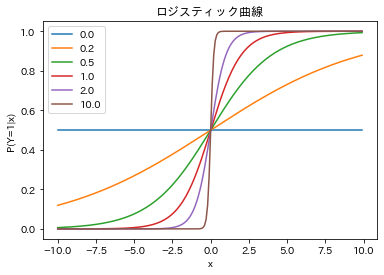

In [7]:
plt.xlabel("x")
plt.ylabel("P(Y=1|x)")
plt.title("ロジスティック曲線")
for i in range(beta_seq.shape[0]):
    beta=beta_seq[i]
    p=f(x_seq)
    plt.plot(x_seq,p,label='{}'.format(beta))
plt.legend(loc='upper left')

## 2.2 Newton-Rapson法の適用

In [8]:
def f(x):
    return x**2-1
def df(x):
    return 2*x

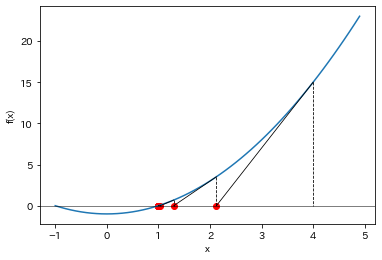

In [9]:
x_seq=np.arange(-1,5,0.1)
f_x=f(x_seq)
plt.plot(x_seq,f_x)
plt.axhline(y=0,c="black",linewidth=0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
x=4
for i in range(10):
    X=x;Y=f(x)  #X,Y更新前の点
    x=x-f(x)/df(x) #x 更新後
    y=f(x)         #y 更新後 
    plt.plot([X,x],[Y,0],c="black",linewidth=0.8)
    plt.plot([X,X],[Y,0],c="black",linestyle="dashed",linewidth=0.8)
    plt.scatter(x,0,c="red")

In [10]:
def f(z):
    return z[0]**2+z[1]**2-1
def dfx(z):
    return 2*z[0]
def dfy(z):
    return 2*z[1]
def g(z):
    return z[0]+z[1]
def dgx(z):
    return 1
def dgy(z):
    return 1

In [11]:
z=np.array([3,4]) #初期値
for i in range(10):
    J=np.array([[dfx(z),dfy(z)],[dgx(z),dgy(z)]])
    z=z-np.linalg.inv(J)@np.array([f(z),g(z)])

In [12]:
z

array([-0.70710678,  0.70710678])

In [13]:
N=1000;p=2
X=randn(N,p) 
X=np.insert(X, 0, 1, axis=1)

In [14]:
beta=randn(p+1)
y=[]
prob=1/(1+np.exp(X@beta))
for i in range(N):
    if (np.random.rand(1)>prob[i]):
        y.append(1)
    else :
        y.append(-1)
#データの生成ここまで
beta #確認

array([-0.90590814, -0.74515943,  0.06710612])

In [409]:
#最尤推定
beta=np.inf
gamma=randn(p+1) #betaの初期値
print(gamma)
while (np.sum((beta-gamma)**2)>0.001):
    beta=gamma
    s=X@beta
    v=np.exp(-s*y)
    u=(y*v)/(1+v)
    w=v/((1+v)**2)
    W=np.diag(w)
    z=s+u/w
    gamma=np.linalg.inv(X.T@W@X)@X.T@W@z
    print (gamma)

[-1.37969586 -0.10428834  0.22712308]
[ 0.00803171  0.05637186 -0.85383562]
[-0.45358945 -0.03360198 -0.41130538]
[-0.41931199 -0.02277072 -0.48822615]
[-0.41958308 -0.02278542 -0.48946317]


In [15]:
# データの生成
n=100
x=np.concatenate([randn(n)+1,randn(n)-1],0)
y=np.concatenate([np.ones(n), -np.ones(n)], 0)

In [16]:
train=np.random.choice(2*n,int(n),replace=False) # 訓練データの添え字
test=list(set(range(2*n))-set(train))     # テストデータの添え字
X=np.insert(x[train].reshape(-1,1), 0, 1, axis=1)
Y=y[train]
# すべて1の列をxの左において、2列とした

In [17]:
# gammaの初期値によっては収束しないので、複数回施行することがある
p=1
beta=[0,0]; gamma=randn(p+1)
print(gamma)
while (np.sum((beta-gamma)**2)>0.001):
    beta=gamma
    s=X@beta
    v=np.exp(-s*Y)
    u=(Y*v)/(1+v)
    w=v/((1+v)**2)
    W=np.diag(w)
    z=s+u/w
    gamma=np.linalg.inv(X.T@W@X)@X.T@W@z
    print (gamma)

[-0.4869565  -0.33037438]
[0.22491205 1.28152174]
[0.08766371 1.68227509]
[0.06739978 1.8261707 ]
[0.06658721 1.83993846]


In [18]:
def table_count(m,u,v):
    n=u.shape[0]
    count=np.zeros([m,m])
    for i in range(n):
        count[int(u[i]),int(v[i])]+=1
    return(count)

In [19]:
ans=y[test] # 正解
pred=np.sign(gamma[0]+x[test]*gamma[1])  # 予測
ans=(ans+1)/2   # -1,1から0,1になおす
pred=(pred+1)/2   # -1,1から0,1になおす
table_count(2,ans, pred)

array([[45.,  8.],
       [ 7., 40.]])

## 2.3 線形判別と２次判別

In [20]:
np.zeros([2,2])

array([[0., 0.],
       [0., 0.]])

In [21]:
# 真のパラメータ
mu_1=np.array([2,2]); sigma_1=2; sigma_2=2; rho_1=0
mu_2=np.array([-3,-3]); sigma_3=1; sigma_4=1; rho_2=-0.8

In [22]:
# 真のパラメータに基づいてデータを発生
n=100
u=randn(n);v=randn(n)
x_1=sigma_1*u+mu_1[0]; y_1=(rho_1*u+np.sqrt(1-rho_1**2)*v)*sigma_2+mu_1[1]
u=randn(n);v=randn(n)
x_2=sigma_3*u+mu_2[0]; y_2=(rho_2*u+np.sqrt(1-rho_2**2)*v)*sigma_4+mu_2[1]

In [23]:
# データからパラメータを推定
mu_1=np.average((x_1,y_1),1); mu_2=np.average((x_2,y_2),1)
df=np.array([x_1,y_1]); mat=np.cov(df,rowvar=1); inv_1=np.linalg.inv(mat); de_1=np.linalg.det(mat)  #
df=np.array([x_2,y_2]); mat=np.cov(df,rowvar=1); inv_2=np.linalg.inv(mat); de_2=np.linalg.det(mat)  #

In [24]:
# 推定されたパラメータを分布の式に代入
def f(x,mu,inv,de):
    return(-0.5*(x-mu).T@inv@(x-mu)-0.5*np.log(de))
def f_1(u,v):
    return f(np.array([u,v]),mu_1, inv_1, de_1)
def f_2(u,v):
    return f(np.array([u,v]),mu_2, inv_2, de_2)

In [25]:
# 等高線データを作成
# この値が0の箇所に境界線をひく
pi_1=0.5; pi_2=0.5
u=v=np.linspace(-6,6,50)
m=len(u)
w=np.zeros([m,m])
for i in range(m):
    for j in range(m):
        w[i,j]=np.log(pi_1)+f_1(u[i],v[j])-np.log(pi_2)-f_2(u[i],v[j])

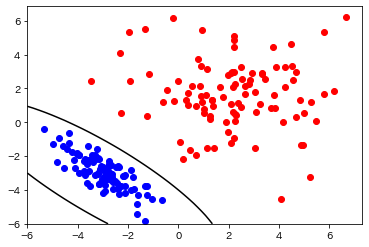

In [26]:
# 境界線とデータをプロット
plt.contour(u,v,w,levels=0,colors=['black'])
plt.scatter(x_1,y_1,c="red")
plt.scatter(x_2,y_2,c="blue")

In [173]:
#  # のついている行を以下のように変更する
xx=np.concatenate((x_1-mu_1[0],x_2-mu_2[0]),0).reshape(-1,1)
yy=np.concatenate((y_1-mu_1[1],y_2-mu_2[1]),0).reshape(-1,1)
df=np.concatenate((xx,yy),1) #データを縦方向に結合した
mat=np.cov(df,rowvar=0)      #縦方向なので0を指定した
inv_1=np.linalg.inv(mat)
de_1=np.linalg.det(mat)
inv_2=inv_1;de_2=de_1

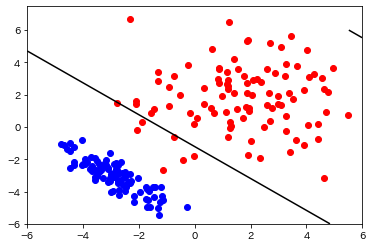

In [174]:
w=np.zeros([m,m])
for i in range(m):
    for j in range(m):
        w[i,j]=np.log(pi_1)+f_1(u[i],v[j])-np.log(pi_2)-f_2(u[i],v[j])
plt.contour(u,v,w,levels=1,colors=['black'])
plt.scatter(x_1,y_1,c="red")
plt.scatter(x_2,y_2,c="blue")

In [491]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names
x=iris.data
y=iris.target
n=len(x)
train=np.random.choice(n,int(n/2),replace=False)
test=list(set(range(n))-set(train))

In [492]:
## パラメータを推定する
X=x[train,:]
Y=y[train]
mu=[]
covv=[]
for j in range(3):
    xx=X[Y==j,:]
    mu.append(np.mean(xx,0))
    covv.append(np.cov(xx,rowvar=0))

In [493]:
## 推定されたパラメータを代入する分布の定義式
def f(w,mu,inv,de):
    return -0.5*(w-mu).T@inv@(w-mu)-0.5*np.log(de)
def g(v,j):
    return f(v,mu[j],np.linalg.inv(covv[j]),np.linalg.det(covv[j]))

In [494]:
z=[]
for i in test:
    z.append(np.argsort([-g(x[i,],0),-g(x[i,],1),-g(x[i,],2)])[0])

In [495]:
table_count(3,y[test],z)

array([[26.,  0.,  0.],
       [ 0., 27.,  1.],
       [ 0.,  2., 19.]])

## 2.4  K近傍法

In [500]:
def knn_1(x,y,z,k):
    x=np.array(x); y=np.array(y)
    dis=[]
    for i in range(x.shape[0]):
        dis.append(np.linalg.norm(z-x[i,]))
    S=np.argsort(dis)[0:k]  #距離が近いk個のindex
    u=np.bincount(y[S])     #度数を数える
    m = [i for i, x in enumerate(u) if x == max(u)] #最頻値のindex
    #タイブレーキングの処理(最頻値が２個以上ある場合)
    while (len(m)>1):
        k=k-1
        S=S[0:k]
        u=np.bincount(y[S])
        m = [i for i, x in enumerate(u) if x == max(u)] #最頻値のindex
    return m[0]

In [284]:
# 一般化
def knn(x,y,z,k):
    w=[]
    for i in range(z.shape[0]):
        w.append(knn_1(x,y,z[i,],k))
    return w

In [496]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names
x=iris.data
y=iris.target

In [497]:
n=x.shape[0]
train=np.random.choice(n, int(n/2), replace=False)
test=list(set(range(n))-set(train))

In [498]:
w=knn(x[train,],y[train],x[test,],k=3)
table_count(3,y[test],w)

array([[22.,  0.,  0.],
       [ 0., 24.,  2.],
       [ 0.,  3., 24.]])

## 2.5 ROC曲線

In [401]:
N_0=10000;N_1=1000
mu_1=1;mu_0=-1  #病気の人1，正常な人0
var_1=1;var_0=1
x=np.random.normal(mu_0,var_0,N_0)
y=np.random.normal(mu_1,var_1,N_1)

In [402]:
theta_seq=np.exp(np.arange(-10,100,0.1))

In [404]:
U=[]; V=[]
for i in range(len(theta_seq)):
    u=np.sum((stats.norm.pdf(x,mu_1,var_1)/stats.norm.pdf(x,mu_0,var_0))>theta_seq[i])/N_0 #病気でない人を病気とみなす
    v=np.sum((stats.norm.pdf(y,mu_1,var_1)/stats.norm.pdf(y,mu_0,var_0))>theta_seq[i])/N_1 #病気の人を病気とみなす
    U.append(u); V.append(v)

In [405]:
AUC=0 #面積を求める
for i in range(len(theta_seq)-1):
    AUC=AUC+np.abs(U[i+1]-U[i])*V[i]

Text(0.3, 0.5, 'AUC=0.9202604999999997')

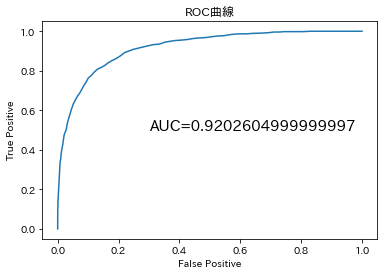

In [406]:
plt.plot(U,V)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC曲線")
plt.text( 0.3,0.5, 'AUC={}'.format(AUC),fontsize=15)